### Edgar Moises Hernandez-Gonzalez
#### 19/11/19-14/12/19
#### Clasificacion de coeficientes DWT de MI-EEG con GRU
##### 10 ejecuciones independientes para obtener la media y desviacion estandar

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.metrics import cohen_kappa_score, confusion_matrix, precision_recall_fscore_support

In [0]:
x_train = pd.read_csv("MI-EEG-DWT-Coef-A01T.csv", header=None)
x_test = pd.read_csv("MI-EEG-DWT-Coef-A01T.csv", header=None)
y_train = pd.read_csv("EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("EtiquetasA01E.csv", header=None)

In [0]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 66)
(288, 66)
(288, 1)
(288, 1)


In [0]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [0]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [0]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [0]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
#convertir de 2D a 3D
x_train = x_train.reshape((n_samples_train, 3, 22))
x_test = x_test.reshape((n_samples_test, 3, 22))

print(x_train.shape)
print(x_test.shape)

(288, 3, 22)
(288, 3, 22)


Iteration: 1
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
288/288 [==============================] - 0s 76us/sample - loss: 2.9251 - acc: 0.5104
kappa:  0.3472222222222222
confusion matrix:
 [[36 21  9  6]
 [15 48  8  1]
 [14  3 25 30]
 [12  3 19 38]]
(0.5060087999432262, 0.5104166666666666, 0.507307338336253, None)


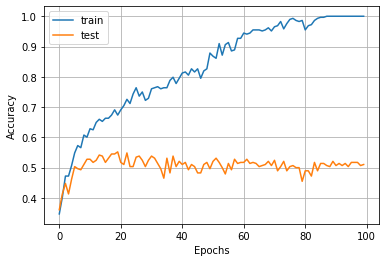

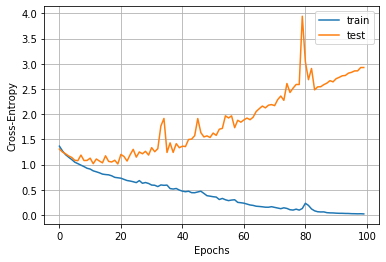

Iteration: 2
288/288 [==============================] - 0s 54us/sample - loss: 3.6022 - acc: 0.4444
kappa:  0.2592592592592593
confusion matrix:
 [[33 20 11  8]
 [25 31 13  3]
 [16  2 25 29]
 [14  3 16 39]]
(0.45171442481569063, 0.4444444444444444, 0.4445986987600909, None)


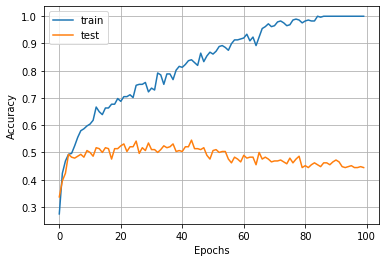

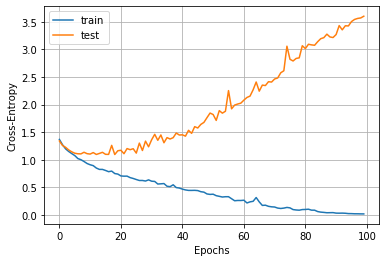

Iteration: 3
288/288 [==============================] - 0s 72us/sample - loss: 3.0245 - acc: 0.5104
kappa:  0.3472222222222222
confusion matrix:
 [[24 32 11  5]
 [11 49 11  1]
 [ 7  4 38 23]
 [ 9  6 21 36]]
(0.5080079325177365, 0.5104166666666666, 0.50343759192583, None)


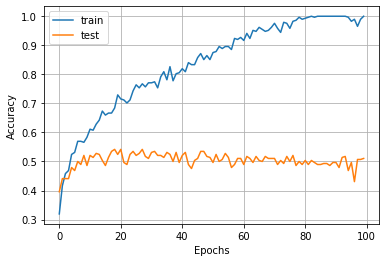

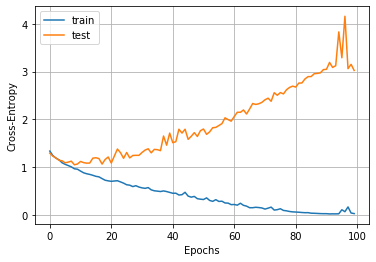

Iteration: 4
288/288 [==============================] - 0s 54us/sample - loss: 3.4360 - acc: 0.4792
kappa:  0.3055555555555556
confusion matrix:
 [[36 23  8  5]
 [25 37  7  3]
 [19  3 29 21]
 [14  4 18 36]]
(0.48920140467610734, 0.47916666666666663, 0.48112307665736437, None)


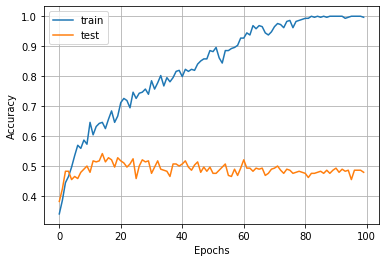

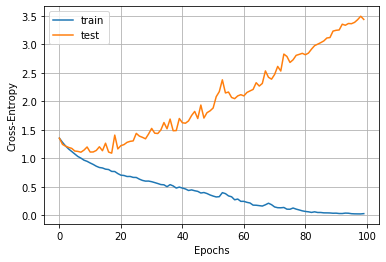

Iteration: 5
288/288 [==============================] - 0s 63us/sample - loss: 3.1977 - acc: 0.4826
kappa:  0.31018518518518523
confusion matrix:
 [[33 19 14  6]
 [21 39  9  3]
 [10  2 28 32]
 [11  4 18 39]]
(0.48566802536231884, 0.48263888888888884, 0.4832075047264146, None)


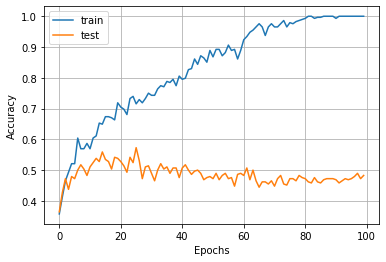

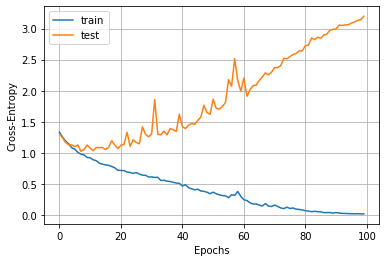

Iteration: 6
288/288 [==============================] - 0s 91us/sample - loss: 3.2566 - acc: 0.4688
kappa:  0.29166666666666663
confusion matrix:
 [[33 24  9  6]
 [22 39  9  2]
 [18  4 28 22]
 [14  3 20 35]]
(0.47478929116860147, 0.46875, 0.47028403020732323, None)


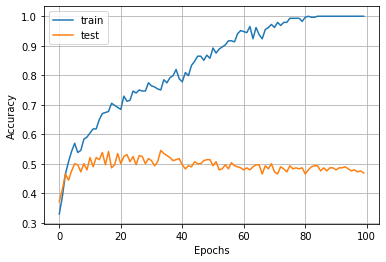

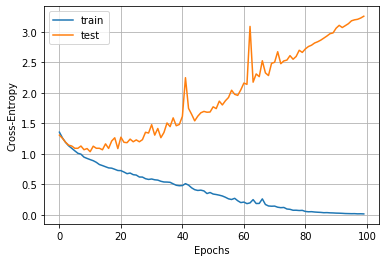

Iteration: 7
288/288 [==============================] - 0s 76us/sample - loss: 3.1424 - acc: 0.4618
kappa:  0.28240740740740744
confusion matrix:
 [[32 22 12  6]
 [25 36 10  1]
 [12  2 27 31]
 [12  1 21 38]]
(0.4677349871338942, 0.4618055555555556, 0.4633623101769442, None)


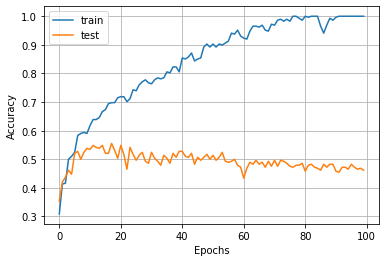

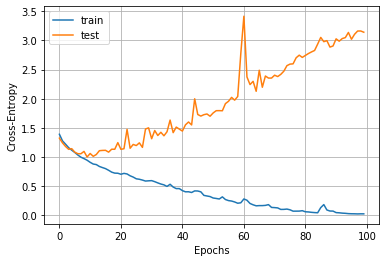

Iteration: 8
288/288 [==============================] - 0s 63us/sample - loss: 3.4286 - acc: 0.4792
kappa:  0.3055555555555556
confusion matrix:
 [[36 21  9  6]
 [21 39 10  2]
 [18  2 28 24]
 [13  2 22 35]]
(0.48666276756041926, 0.47916666666666663, 0.48107241365856, None)


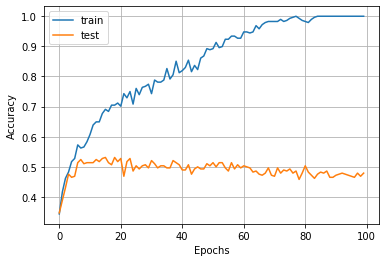

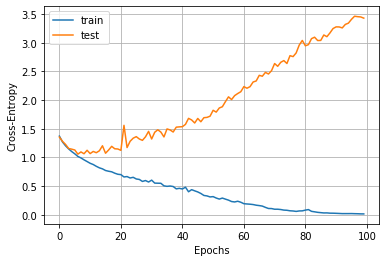

Iteration: 9
288/288 [==============================] - 0s 71us/sample - loss: 3.2427 - acc: 0.4931
kappa:  0.32407407407407407
confusion matrix:
 [[39 19  8  6]
 [24 38  8  2]
 [18  2 29 23]
 [13  3 20 36]]
(0.5028160304543488, 0.4930555555555556, 0.4945967432302837, None)


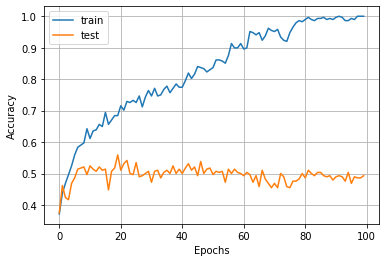

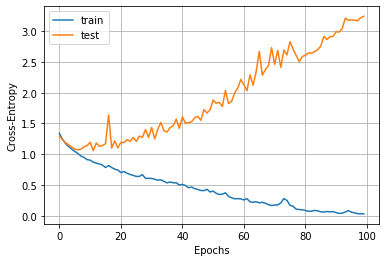

Iteration: 10
288/288 [==============================] - 0s 80us/sample - loss: 3.2719 - acc: 0.4861
kappa:  0.31481481481481477
confusion matrix:
 [[34 23 10  5]
 [17 42 11  2]
 [17  4 28 23]
 [13  3 20 36]]
(0.4885845166642268, 0.4861111111111111, 0.4866700071949841, None)


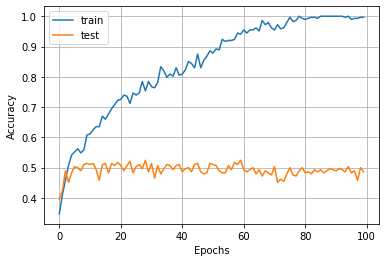

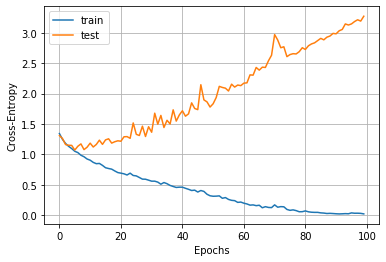


Resultados:
loss: [2.9251372549268932, 3.60218784544203, 3.024502091937595, 3.435959471596612, 3.1976555983225503, 3.256587929195828, 3.142374806933933, 3.428565157784356, 3.2426670922173395, 3.271853552924262]
accuracy: [0.5104167, 0.44444445, 0.5104167, 0.47916666, 0.4826389, 0.46875, 0.46180555, 0.47916666, 0.49305555, 0.4861111]
kappa: [0.3472222222222222, 0.2592592592592593, 0.3472222222222222, 0.3055555555555556, 0.31018518518518523, 0.29166666666666663, 0.28240740740740744, 0.3055555555555556, 0.32407407407407407, 0.31481481481481477]
precision: [0.5060087999432262, 0.45171442481569063, 0.5080079325177365, 0.48920140467610734, 0.48566802536231884, 0.47478929116860147, 0.4677349871338942, 0.48666276756041926, 0.5028160304543488, 0.4885845166642268]
recall: [0.5104166666666666, 0.4444444444444444, 0.5104166666666666, 0.47916666666666663, 0.48263888888888884, 0.46875, 0.4618055555555556, 0.47916666666666663, 0.4930555555555556, 0.4861111111111111]
f1: [0.507307338336253, 0.4445986

In [0]:
array_test_loss = []
array_test_acc = []
array_kappa = []
array_precision = []
array_recall = []
array_f1 = []
for i in range(10):
    print("Iteration:", i+1);
    
    model = Sequential()
    model.add(GRU(128, input_shape=(3,22)))
    model.add(Dropout(0.2))
    model.add(Dense(n_classes, activation='softmax'))
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=100, batch_size=18, validation_data=(x_test, y_test), verbose=0)
    test_loss, test_acc = model.evaluate(x_test, y_test)
    array_test_loss.append(test_loss)
    array_test_acc.append(test_acc)
    
    probabilidades = model.predict(x_test)
    y_pred = np.argmax(probabilidades, 1) #1=fila
    kappa = cohen_kappa_score(y_test, y_pred)
    print("kappa: ", kappa)
    array_kappa.append(kappa)
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("confusion matrix:\n", matriz_confusion)
    metricas = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(metricas)
    array_precision.append(metricas[0])
    array_recall.append(metricas[1])
    array_f1.append(metricas[2])
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy')
    plt.legend(['train', 'test'])
    plt.show()
    
print()    
print("Resultados:")
print("loss:", array_test_loss)
print("accuracy:", array_test_acc)
print("kappa:", array_kappa)
print("precision:", array_precision)
print("recall:", array_recall)
print("f1:", array_f1)

In [0]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_9 (GRU)                  (None, 128)               57984     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 516       
Total params: 58,500
Trainable params: 58,500
Non-trainable params: 0
_________________________________________________________________


In [0]:
print("Mean: %.4f" % np.mean(array_test_acc))
print("std: (+/- %.4f)" % np.std(array_test_acc))
print("kappa: %.4f" % np.mean(array_kappa))
print("precision: %.4f" % np.mean(array_precision))
print("recall: %.4f" % np.mean(array_recall))
print("f1: %.4f" % np.mean(array_f1))

Mean: 0.4816
std: (+/- 0.0194)
kappa: 0.3088
precision: 0.4861
recall: 0.4816
f1: 0.4816
